### Download dataset from kaggle

In [1]:
! pip install kaggle -q

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp /content/drive/MyDrive/Colab/kaggle.json ~/.kaggle

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download prashant268/chest-xray-covid19-pneumonia

Dataset URL: https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia
License(s): unknown
 98% 2.01G/2.06G [00:08<00:00, 501MB/s]
100% 2.06G/2.06G [00:08<00:00, 249MB/s]


In [6]:
! unzip -q chest-xray-covid19-pneumonia.zip

In [7]:
! rm -rf chest-xray-covid19-pneumonia.zip

### Imports

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import os

In [49]:
train_data_path = '/content/Data/train/'
test_data_path = '/content/Data/test/'

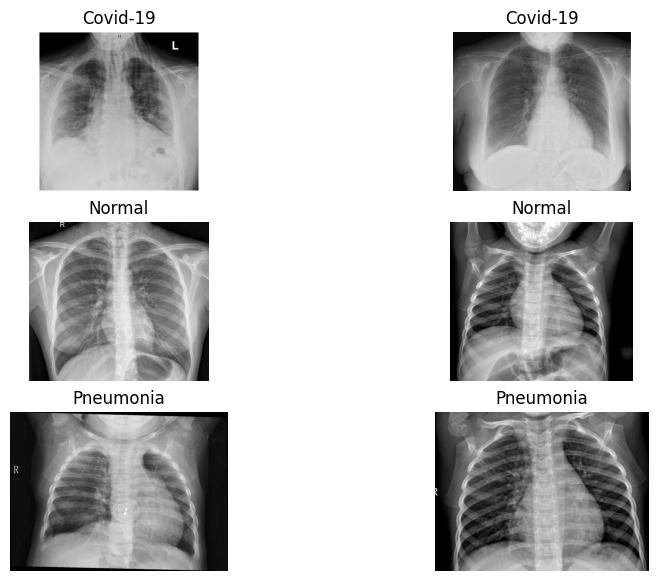

In [50]:
from PIL import Image
fig = plt.figure(figsize = (10 , 7))

plt.subplot(3 , 2 , 1)
plt.imshow(Image.open(train_data_path + 'COVID19/COVID19(10).jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Covid-19')

plt.subplot(3 , 2 , 2)
plt.imshow(Image.open(train_data_path + 'COVID19/COVID19(100).jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Covid-19')

plt.subplot(3 , 2 , 3)
plt.imshow(Image.open(train_data_path + 'NORMAL/NORMAL(10).jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Normal')

plt.subplot(3 , 2 , 4)
plt.imshow(Image.open(train_data_path + 'NORMAL/NORMAL(100).jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Normal')

plt.subplot(3 , 2 , 5)
plt.imshow(Image.open(train_data_path + 'PNEUMONIA/PNEUMONIA(10).jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Pneumonia')

plt.subplot(3 , 2 , 6)
plt.imshow(Image.open(train_data_path + 'PNEUMONIA/PNEUMONIA(100).jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Pneumonia')

plt.show()

In [51]:
img  = Image.open(train_data_path + 'COVID19/COVID19(10).jpg')
print(img.size)
print(np.array(img).shape)

(1038, 1031)
(1031, 1038, 3)


In [52]:
def count_images_per_class(dataset_dir):
    class_counts = {}
    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_counts = count_images_per_class(train_data_path)
print("Train:", train_counts)

test_counts = count_images_per_class(test_data_path)
print("Test:", test_counts)

Train: {'PNEUMONIA': 3418, 'COVID19': 460, 'NORMAL': 1266}
Test: {'PNEUMONIA': 855, 'COVID19': 116, 'NORMAL': 317}


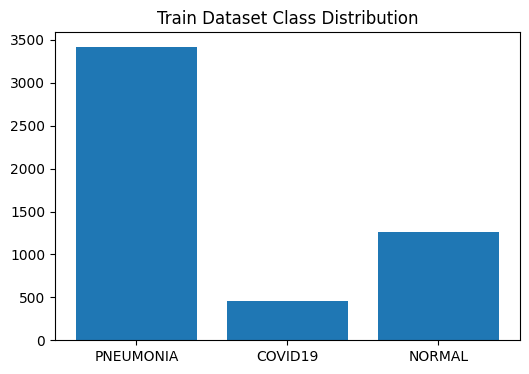

In [53]:
plt.figure(figsize=(6, 4))
plt.bar(train_counts.keys(), train_counts.values())
plt.title("Train Dataset Class Distribution")
plt.show()

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rescale = 1 / 255 ,
    horizontal_flip = True
)

batch_size = 32
target_size = (250 , 250)
image_shape = (250 , 250 , 3)

In [55]:
train_data_gen = data_gen.flow_from_directory(train_data_path , target_size = target_size , batch_size = batch_size , class_mode = 'categorical')
test_data_gen = data_gen.flow_from_directory(test_data_path , target_size = target_size , batch_size = batch_size , class_mode = 'categorical')

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [56]:
class_name = train_data_gen.class_indices
class_name

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [57]:
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout

In [ ]:
model = keras.models.Sequential()
model.add(Conv2D(filters = 32 , kernel_size = (3 , 3) , activation = 'relu' , input_shape = image_shape , padding = 'same' , strides = 1))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Conv2D(filters = 128 , kernel_size = (3 , 3) , activation = 'relu' , padding = 'same' , strides = 1))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Conv2D(filters = 512 , kernel_size = (3 , 3) , activation = 'relu' , padding = 'same' , strides = 1))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 3 , activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 250, 250, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   251,920,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,619,011 (963.67 MB)

 Trainable params: 252,619,011 (963.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.002) ,
    loss = tf.losses.CategoricalCrossentropy() ,
    metrics = [tf.metrics.CategoricalAccuracy]
)

In [ ]:
model.fit(train_data_gen , epochs = 20 , batch_size = batch_size , validation_data = test_data_gen , verbose = 2)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
161/161 - 94s - 583ms/step - categorical_accuracy: 0.7173 - loss: 0.8135 - val_categorical_accuracy: 0.8238 - val_loss: 0.4374
Epoch 2/20
161/161 - 68s - 423ms/step - categorical_accuracy: 0.8703 - loss: 0.3651 - val_categorical_accuracy: 0.8703 - val_loss: 0.4608
Epoch 3/20
161/161 - 68s - 425ms/step - categorical_accuracy: 0.8906 - loss: 0.3185 - val_categorical_accuracy: 0.8944 - val_loss: 0.3128
Epoch 4/20
161/161 - 68s - 423ms/step - categorical_accuracy: 0.9090 - loss: 0.2703 - val_categorical_accuracy: 0.9200 - val_loss: 0.2431
Epoch 5/20
161/161 - 67s - 419ms/step - categorical_accuracy: 0.9234 - loss: 0.2365 - val_categorical_accuracy: 0.9332 - val_loss: 0.2138
Epoch 6/20
161/161 - 67s - 415ms/step - categorical_accuracy: 0.9300 - loss: 0.2137 - val_categorical_accuracy: 0.9340 - val_loss: 0.1980
Epoch 7/20
161/161 - 66s - 412ms/step - categorical_accuracy: 0.9372 - loss: 0.1823 - val_categorical_accuracy: 0.9433 - val_loss: 0.1667
Epoch 8/20
161/161 - 66s - 410ms/s

In [ ]:
model.evaluate(test_data_gen)

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 326ms/step - categorical_accuracy: 0.9517 - loss: 0.2773


[0.28964364528656006, 0.9526397585868835]

#  Transfer learning


### #1

In [58]:
from keras.applications import EfficientNetV2S

In [ ]:
pre_train_model = EfficientNetV2S(include_top = False , weights = 'imagenet' , input_shape = image_shape)

pre_train_model.trainable = False

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
pre_train_model.summary()

Model: "efficientnetv2-s"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 250, 250,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 250, 250,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 125, 125,  │        648 │ rescaling[0][0]   │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 125, 125,  │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 125, 125,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 125, 125,  │      5,184 │ stem_activation[… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 125, 125,  │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 125, 125,  │          0 │ block1a_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 125, 125,  │          0 │ block1a_project_… │
│                     │ 24)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 125, 125,  │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 125, 125,  │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 125, 125,  │          0 │ block1b_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 125, 125,  │          0 │ block1b_project_… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 125, 125,  │          0 │ block1b_drop[0][… │
│                     │ 24)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 63, 63,    │     20,736 │ block1b_add[0][0] │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 63, 63,    │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 63, 63,    │          0 │ block2a_expand_b

 Total params: 20,331,360 (77.56 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,331,360 (77.56 MB)

In [ ]:
model = keras.models.Sequential()
model.add(pre_train_model)
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 3 , activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-s (Functional)   │ (None, 8, 8, 1280)     │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 81920)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    41,943,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,344,803 (237.83 MB)

 Trainable params: 42,013,443 (160.27 MB)

 Non-trainable params: 20,331,360 (77.56 MB)

In [ ]:
model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.002) ,
    loss = tf.losses.CategoricalCrossentropy() ,
    metrics = [tf.metrics.CategoricalAccuracy]
)

In [ ]:
model.fit(train_data_gen , epochs = 20 , batch_size = batch_size , validation_data = test_data_gen , verbose = 2)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
161/161 - 193s - 1s/step - categorical_accuracy: 0.5612 - loss: 9.2074 - val_categorical_accuracy: 0.6638 - val_loss: 0.8619
Epoch 2/20
161/161 - 65s - 404ms/step - categorical_accuracy: 0.6417 - loss: 1.0354 - val_categorical_accuracy: 0.6638 - val_loss: 0.7976
Epoch 3/20
161/161 - 66s - 408ms/step - categorical_accuracy: 0.6567 - loss: 0.8892 - val_categorical_accuracy: 0.6638 - val_loss: 0.8195
Epoch 4/20
161/161 - 65s - 406ms/step - categorical_accuracy: 0.6596 - loss: 0.8540 - val_categorical_accuracy: 0.6638 - val_loss: 0.7536
Epoch 5/20
161/161 - 65s - 405ms/step - categorical_accuracy: 0.6853 - loss: 0.7864 - val_categorical_accuracy: 0.6894 - val_loss: 0.6548
Epoch 6/20
161/161 - 66s - 407ms/step - categorical_accuracy: 0.6977 - loss: 0.7468 - val_categorical_accuracy: 0.6700 - val_loss: 0.7005
Epoch 7/20
161/161 - 66s - 409ms/step - categorical_accuracy: 0.7082 - loss: 0.7447 - val_categorical_accuracy: 0.6964 - val_loss: 0.6705
Epoch 8/20
161/161 - 66s - 407ms/ste

In [ ]:
model.evaluate(test_data_gen)

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 320ms/step - categorical_accuracy: 0.7780 - loss: 0.6269


[0.6428994536399841, 0.7647515535354614]

### #2


In [59]:
pre_train_model = EfficientNetV2S(include_top = False , weights = 'imagenet' , input_shape = image_shape)
pre_train_model.trainable = False

In [60]:
for layer in pre_train_model.layers[-20 : ] :
    layer.trainable = True

In [61]:
pre_train_model.summary()

Model: "efficientnetv2-s"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 250, 250,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 250, 250,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 125, 125,  │        648 │ rescaling_3[0][0] │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 125, 125,  │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 125, 125,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 125, 125,  │      5,184 │ stem_activation[… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 125, 125,  │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 125, 125,  │          0 │ block1a_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 125, 125,  │          0 │ block1a_project_… │
│                     │ 24)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 125, 125,  │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 125, 125,  │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 125, 125,  │          0 │ block1b_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 125, 125,  │          0 │ block1b_project_… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 125, 125,  │          0 │ block1b_drop[0][… │
│                     │ 24)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 63, 63,    │     20,736 │ block1b_add[0][0] │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 63, 63,    │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 63, 63,    │          0 │ block2a_expand_b

 Total params: 20,331,360 (77.56 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,331,360 (77.56 MB)

In [62]:
model = keras.models.Sequential()
model.add(pre_train_model)
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 3 , activation = 'softmax'))

In [63]:
model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.002) ,
    loss = tf.losses.CategoricalCrossentropy() ,
    metrics = [tf.metrics.CategoricalAccuracy]
)

In [ ]:
model.fit(train_data_gen , epochs = 20 , batch_size = batch_size , validation_data = test_data_gen , verbose = 2)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


In [ ]:
model.evaluate(test_data_gen)